# Recommender Systems

        Book: Recomender Systems by Jannach and Zanker
        
        > Linear Algebra
***
        
## Two Most Common Type of Recommender System

- ** Content-Based **

    Focusing on the attributes of the items and recommending ** based on the similarity between items ** ( ex. based on similar items )


- ** Collaborative Filtering (CF) **

    ** Based on the knowledge of users' attitude to items** , which means it uses the "wisdom of crowd" to recommend the items ( ex. based on others shopping experience )
    
    > can be divided into ** Memory-Based Collaborative Filtering** and ** Model-Based Colaborative filtering**.
    
***

## explicit feedback model/ implicit feedback model

Most recommendation models consist of building a user-by-item matrix (pivot table). If the entries value is the **numerical ratings that users give items, then this is called an explicit feedback model**. Alternatively, **one may include implicit feedback which are actions by a user that signify a positive or negative preference** for a given item (such as viewing the item online). 

> These two scenarios often must be treated differently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [4]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


- ## Preprocess/ Clean Data

In [5]:
df.item_id.nunique(), df.title.nunique()

(1682, 1664)

In [6]:
check_unique = df.groupby("title").item_id.nunique()
check_unique[check_unique > 1]

title
Body Snatchers (1993)             2
Butcher Boy, The (1998)           2
Chairman of the Board (1998)      2
Chasing Amy (1997)                2
Deceiver (1997)                   2
Designated Mourner, The (1997)    2
Desperate Measures (1998)         2
Fly Away Home (1996)              2
Hugo Pool (1997)                  2
Hurricane Streets (1998)          2
Ice Storm, The (1997)             2
Kull the Conqueror (1997)         2
Money Talks (1997)                2
Nightwatch (1997)                 2
Sliding Doors (1998)              2
Substance of Fire, The (1996)     2
That Darn Cat! (1997)             2
Ulee's Gold (1997)                2
Name: item_id, dtype: int64

    id is not unique, we would like to clean id....

In [7]:
check_unique = pd.DataFrame(check_unique[check_unique > 1])
#check_unique.join(df.set_index("title"),how = "left")
check_unique["count"] = check_unique
check_unique.drop("item_id",inplace=True,axis = 1)

In [8]:
check_unique.join(df.set_index("title").item_id,how = "left").groupby(["title","item_id"]).item_id.describe()

count    mean  std     min     25%  \
title                          item_id                                       
Body Snatchers (1993)          573       33.0   573.0  0.0   573.0   573.0   
                               670       36.0   670.0  0.0   670.0   670.0   
Butcher Boy, The (1998)        1645       1.0  1645.0  NaN  1645.0  1645.0   
                               1650       1.0  1650.0  NaN  1650.0  1650.0   
Chairman of the Board (1998)   1234       8.0  1234.0  0.0  1234.0  1234.0   
                               1654       1.0  1654.0  NaN  1654.0  1654.0   
Chasing Amy (1997)             246      124.0   246.0  0.0   246.0   246.0   
                               268      255.0   268.0  0.0   268.0   268.0   
Deceiver (1997)                309       28.0   309.0  0.0   309.0   309.0   
                               1606       1.0  1606.0  NaN  1606.0  1606.0   
Designated Mourner, The (1997) 1256       3.0  1256.0  0.0  1256.0  1256.0   
                               1257       4.0  1257.0  0.0  1257.0  1257.0   
Desperate Measures (1998)      329       45.0   329.0  0.0   329.0   329.0   
                               348       27.0   348.0  0.0   348.0   348.0   
Fly Away Home (1996)           304      149.0   304.0  0.0   304.0   304.0   
                               500       31.0   500.0  0.0   500.0   500.0   
Hugo Pool (1997)               1175       5.0  1175.0  0.0  1175.0  1175.0   
                               1617       2.0  1617.0  0.0  1617.0  1617.0   
Hurricane Streets (1998)       1395       6.0  1395.0  0.0  1395.0  1395.0   
                               1607       3.0  1607.0  0.0  1607.0  1607.0   
Ice Storm, The (1997)          305       87.0   305.0  0.0   305.0   305.0   
                               865       21.0   865.0  0.0   865.0   865.0   
Kull the Conqueror (1997)      266       35.0   266.0  0.0   266.0   266.0   
                               680       34.0   680.0  0.0   680.0   680.0   
Money Talks (1997)             876       47.0   876.0  0.0   876.0   876.0   
                               881       45.0   881.0  0.0   881.0   881.0   
Nightwatch (1997)              1477       2.0  1477.0  0.0  1477.0  1477.0   
                               1625       1.0  1625.0  NaN  1625.0  1625.0   
Sliding Doors (1998)           1429       4.0  1429.0  0.0  1429.0  1429.0   
                               1680       1.0  1680.0  NaN  1680.0  1680.0   
Substance of Fire, The (1996)  711        1.0   711.0  NaN   711.0   711.0   
                               1658       3.0  1658.0  0.0  1658.0  1658.0   
That Darn Cat! (1997)          878       33.0   878.0  0.0   878.0   878.0   
                               1003       8.0  1003.0  0.0  1003.0  1003.0   
Ulee's Gold (1997)             297       50.0   297.0  0.0   297.0   297.0   
                               303      134.0   303.0  0.0   303.0   303.0   

                                           50%     75%     max  
title                          item_id                          
Body Snatchers (1993)          573       573.0   573.0   573.0  
                               670       670.0   670.0   670.0  
Butcher Boy, The (1998)        1645     1645.0  1645.0  1645.0  
                               1650     1650.0  1650.0  1650.0  
Chairman of the Board (1998)   1234     1234.0  1234.0  1234.0  
                               1654     1654.0  1654.0  1654.0  
Chasing Amy (1997)             246       246.0   246.0   246.0  
                               268       268.0   268.0   268.0  
Deceiver (1997)                309       309.0   309.0   309.0  
                               1606     1606.0  1606.0  1606.0  
Designated Mourner, The (1997) 1256     1256.0  1256.0  1256.0  
                               1257     1257.0  1257.0  1257.0  
Desperate Measures (1998)      329       329.0   329.0   329.0  
                               348       348.0   348.0   348.0  
Fly Away Home (1996)           304 

       above movies all has two id lol...

In [9]:
# reformat id
new_movie_index = dict((y, x) for x, y in zip(range(df.title.nunique()),df.title.unique()))

In [10]:
df.item_id = df.title.map(new_movie_index)
df.item_id.nunique(), df.title.nunique()

(1664, 1664)

In [11]:
# first get pivot table
user_item_matrix = pd.pivot_table(df,"rating","user_id","item_id",fill_value=0)
user_item_matrix.head(2)

item_id,0,1,2,3,4,5,6,7,8,9,...,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663
user_id,,,,,,,,,,,,,,,,,,,,,
0,5,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,5,4,5,0,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0


***
- ## Sparsity 

    This means that the percentage of the user-item-matrix have a real value

$$ {\#\mbox{ of valid entry } \over \# \mbox{ of total entry } } \times 100 \%$$

    One thing to note is that if the sparsity of the matrix is below 1% (rule of thumb), then the dataset might be too sparse to perform any sort of modeling.
        

In [12]:
print 100.0*sum(user_item_matrix[user_item_matrix != 0].count())/user_item_matrix.shape[0]/user_item_matrix.shape[1] ,"%"

6.34676499348 %


In [13]:
user_item_matrix[user_item_matrix != 0].count(axis = 1).describe()

count    944.000000
mean     105.610169
std      100.622846
min        3.000000
25%       33.000000
50%       64.000000
75%      147.250000
max      736.000000
dtype: float64

(0, 50)

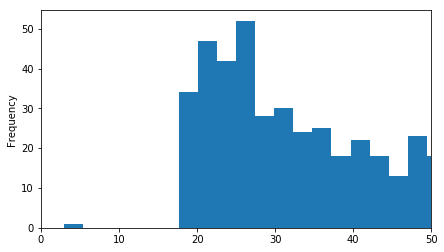

In [14]:
plt.figure(figsize=(7,4))
user_item_matrix[user_item_matrix != 0].count(axis = 1).plot(kind = "hist",bins = 300)
plt.xlim(0,50)

   Notice that some people rated less than 10 movies, therefore we would like to remove this data which is hard for us to consider their opinion as "useful". In this case we would like to remomve the user in our model who rated less than 10 movies. Thus, every user has rated at least 19 movies (show below).

In [15]:
print list(user_item_matrix[user_item_matrix[user_item_matrix != 0].count(axis = 1) <= 10].index)
user_item_matrix = user_item_matrix[user_item_matrix[user_item_matrix != 0].count(axis = 1) > 10]

[0]


In [16]:
df = df[df.user_id != 0]

In [17]:
user_item_matrix[user_item_matrix != 0].count(axis = 1).describe()

count    943.000000
mean     105.718982
std      100.620656
min       19.000000
25%       33.000000
50%       64.000000
75%      147.500000
max      736.000000
dtype: float64

- ## Train Test Split
    
    Note that in this case, we have no specific predicted/responsed variables. What we want to do is using some existing entries to predict other none entries based on a specific user or item. More appropriately, we would like to randomly split our data into training and test sets by removing some exsiting ratings from the training set and placing them in the test set. 
    
    There are two ways to do this.
    >1.
    
    > we can just segement the **original data frame** into two sets of data, basically we remove some rate
    
    >         sklearn.cross_validation import train_test_split
    > 2.
    
    > The first approach might remove all the rate from single person which is what we want to avoiding, since it will have no attiribute for us to recommand other movies for him cause we don't have any his data in training model. More appropriately, we would like to removing some ratings **per user** from the training set and placing them in the test set.
    
    > In this case, it's reasonble for us to removing 9 ratings per user from the training set since each user has rated at least 19 movies

In [286]:
#1.
from sklearn.model_selection import train_test_split
train_data1, test_data1 = train_test_split(df, test_size=0.25)

#2.
def train_test_split(ratings):
    test = pd.DataFrame(np.zeros(ratings.shape), index = ratings.index, columns = ratings.columns)
    train = ratings.copy()
    for i in range(len(ratings.index)):
        
        
        test_ratings = np.random.choice(
                        ratings.iloc[i].nonzero()[0], # Return the 2D-indices of the elements that are non-zero
                        size=9, 
                        replace=False) # sample without replacement
        
        train.iloc[i,test_ratings] = 0
        test.iloc[i,test_ratings] = ratings.iloc[i,test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

train_data2, test_data2 =train_test_split(user_item_matrix)

# Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering approaches can be divided into two main sections: **user-item filtering** and **item-item filtering**. 

A *user-item filtering* will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked. 

In contrast, *item-item filtering* will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations. 

* *Item-Item Collaborative Filtering*: “Users who liked this item also liked …”
* *User-Item Collaborative Filtering*: “Users who are similar to you also liked …”

***

- ## Compute Distance Matric / Calculate Similarity

    **  cosine similarity **
    
    > *user-item similarity:*
    
    > for any pair of users vector $u_k$ and the user vector $u_a$ 
    
    <img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{k,m}x_{a,m}}{\sqrt{\sum&space;x_{k,m}^2\sum&space;x_{a,m}^2}}"/>
    
    > *item-item similarity:*
    
    > for any pair of item vector $i_m$ and the item vector $i_b$ 
    
    <img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{a,b}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{a,b}^2}}
"/>

In [287]:
df.head()

,user_id,item_id,rating,timestamp,title
1,290,0,5,880473582,Star Wars (1977)
2,79,0,4,891271545,Star Wars (1977)
3,2,0,5,888552084,Star Wars (1977)
4,8,0,5,879362124,Star Wars (1977)
5,274,0,5,878944679,Star Wars (1977)


In [288]:
sorted(df.user_id.unique()) == range(1,944)

True

In [289]:
# train_data1, test_data1
#Create two user-item matrices, one for training and another for testing
# numpy version
train_data_matrix1 = np.zeros((df.user_id.nunique(), df.item_id.nunique()))
for line in train_data1.itertuples():
    train_data_matrix1[line[1]-1, line[2]-1] = line[3]  

test_data_matrix1 = np.zeros((df.user_id.nunique(), df.item_id.nunique()))
for line in test_data1.itertuples():
    test_data_matrix1[line[1]-1, line[2]-1] = line[3]
    
# pandas version
# doesn't work!!!!!!!!!!!!!!!!!!! since some movie might be removed
train_data_matrix_df = pd.pivot_table(train_data1,"rating","user_id","item_id",fill_value=0)
test_data_matrix_df = pd.pivot_table(test_data1,"rating","user_id","item_id",fill_value=0)

        from sklearn.metrics.pairwise import pairwise_distances

        from sklearn.metrics.pairwise import cosine_similarity
        
>    **Note: Using pairwise_distance migth be helpful to avoid divide by zero when predicting the value**
        
[pairwise_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html) function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.

In [290]:
## same as below
def df_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array(np.sqrt(np.diagonal(sim)))
    
    return (sim.divide(norms,axis = 1).divide(norms,axis = 0))


from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_distance1 = pairwise_distances(train_data_matrix1, metric='cosine')
item_similarity_distance1 = pairwise_distances(train_data_matrix1.T, metric='cosine')
user_similarity1 = cosine_similarity(train_data_matrix1)
item_similarity1 = cosine_similarity(train_data_matrix1.T)

In [291]:
user_similarity2 = df_similarity(train_data2, kind='user')
item_similarity2 = df_similarity(train_data2, kind='item')
user_similarity_distance2 = pairwise_distances(train_data2, metric='cosine')
item_similarity_distance2 = pairwise_distances(train_data2.T, metric='cosine')

In [292]:
print user_similarity2.iloc[:3,:3]
print "\n"
print cosine_similarity(train_data2)[:3,:3]

user_id         1         2         3
user_id                              
1        1.000000  0.151966  0.028114
2        0.151966  1.000000  0.071804
3        0.028114  0.071804  1.000000


[[ 1.          0.15196642  0.02811438]
 [ 0.15196642  1.          0.07180396]
 [ 0.02811438  0.07180396  1.        ]]


$$ \mbox{Similarity Distance Matric} = 1 - \mbox{Similarity Matric }$$

In [293]:
# actually are same
print ((1-user_similarity2) - user_similarity_distance2).round(2).iloc[:10,:10]

user_id   1    2    3    4    5    6    7    8    9    10
user_id                                                  
1       -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
2       -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
3       -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
4       -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
5       -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0
6       -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0
7       -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
8       -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
9       -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0
10      -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0


***
- ## Prddict

    With our similarity matrix in hand, we can now predict the ratings that were not included with the data. The idea is very simple, for item *m*, we use the similarity between item *m* and any other items denoted by *b* as weights that are multiplied by the ratings of user *b*. Thus, we will get the expected total rating score of item *m* from user *k*
    
    $$ \hat{X}_{k,m} = \sum_{i_b} sim_i(i_m,i_b) \; X_{k,b} $$
    
    We must also normalize by the number by total weights, if not we can get very large number if we have a very
    large data set
    
    Therefore the prediction rating of each entry will be
    
    <img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\frac{\sum\limits_{i_b}&space;sim_i(i_m,&space;i_b)&space;(x_{k,b})&space;}{\sum\limits_{i_b}|sim_i(i_m,&space;i_b)|}"/>
    
    
    
   ** It turns out that we might like to do some correction for user-item silimarity model **. The idea here is that some every users rates the movies differently (some might always rates higher. For example, a user *k* gives 4 stars to his favourite movies while a user *a* gives 5 stars to her favourite movies). 
   
   ** The relative difference in the ratings that these users give is more important than the absolute values. ** Therefore, we can correct the prediction by the user's average rating. Which will be the equation below
   
   ### which also known as Bias-subtracted Collaborative Filtering
   
   
   <img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\bar{x}_{k}&space;&plus;&space;\frac{\sum\limits_{u_a}&space;sim_u(u_k,&space;u_a)&space;(x_{a,m}&space;-&space;\bar{x_{u_a}})}{\sum\limits_{u_a}|sim_u(u_k,&space;u_a)|}"/>
   
   

In [294]:
def predict_correc(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

def predict_nocorrec(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [295]:
item_prediction_c1 = predict_correc(train_data_matrix1, 1- item_similarity_distance1, type='item')
user_prediction_c1 = predict_correc(train_data_matrix1, 1- user_similarity_distance1, type='user')

item_prediction_nc1 = predict_nocorrec(train_data_matrix1, 1- item_similarity_distance1, kind='item')
user_prediction_nc1 = predict_nocorrec(train_data_matrix1, 1- user_similarity_distance1, kind='user')

In [296]:
item_prediction_c2 = predict_correc(np.array(train_data2), np.array(item_similarity2), type='item')
user_prediction_c2 = predict_correc(np.array(train_data2), np.array(user_similarity2), type='user')

item_prediction_nc2 = predict_nocorrec(np.array(train_data2), np.array(item_similarity2), kind='item')
user_prediction_nc2 = predict_nocorrec(np.array(train_data2), np.array(user_similarity2), kind='user')

***

- ## Evaluate

       from sklearn.metrics import mean_squared_error
       
    There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is **Mean Squared Error (MSE)** or **Root Mean Squared Error (RMSE)**.
    
    <img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

    >  Note: we only want to consider predicted ratings that are in the **test dataset**, thus we should filter out all other elements in the prediction matrix with 
    
        prediction[actual.nonzero()].flatten()
        
        df.nonzero() --->  Return the indices sets of the elements that are non-zero
        
        flatten() --->  Return a copy of the array collapsed into one dimension.

In [297]:
test_data_matrix1[test_data_matrix1.nonzero()].flatten()

array([ 5.,  4.,  4., ...,  5.,  2.,  3.])

In [298]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def mse(prediction, actual):
    prediction = prediction[actual.nonzero()].flatten() 
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, prediction)

In [299]:
print "with correction for user-item"
print('User-based CF MSE: ' + str(mse(user_prediction_c1, test_data_matrix)))
print('Item-based CF MSE: ' + str(mse(item_prediction_c1, test_data_matrix)))
print "\n"
print "without correction for user-item"
print('User-based CF MSE: ' + str(mse(user_prediction_nc1, test_data_matrix)))
print('Item-based CF MSE: ' + str(mse(item_prediction_nc1, test_data_matrix)))

with correction for user-item
User-based CF MSE: 8.47136899034
Item-based CF MSE: 9.71654396372


without correction for user-item
User-based CF MSE: 8.96642188179
Item-based CF MSE: 9.71654396372


In [300]:
print "with correction for user-item"
print('User-based CF MSE: ' + str(mse(user_prediction_c2, np.array(test_data2))))
print('Item-based CF MSE: ' + str(mse(item_prediction_c2, np.array(test_data2))))
print "\n"
print "without correction for user-item"
print('User-based CF MSE: ' + str(mse(user_prediction_nc2, np.array(test_data2))))
print('Item-based CF MSE: ' + str(mse(item_prediction_nc2, np.array(test_data2))))

with correction for user-item
User-based CF MSE: 8.61736234396
Item-based CF MSE: 11.4817399261


without correction for user-item
User-based CF MSE: 8.34417890795
Item-based CF MSE: 11.4817399261


- ### Conclution:

   After several testing, ** using the second way to split the data provide better prediction on user-based CF but the first way provide the better prediction on Item-based CF**. However, it is still not clear which model should we prefer. We should use **cross validation** to choose the best performance.
   
   It is interesting to see that actually the prediction with correction does not always performe better than the prediction without correction. It is also not cleat that which train split data will provide better result. More appropriately, we should use **cross validation** to choose the best performance.
   
***

- ## Improvement: Top-K Collaborative Filtering

    We can attempt to improve our prediction MSE by only considering the top *k* users who are most similar to the input user (or, similarly, the top *k* items). That is, when we calculate the sums over users/items, we only sum over the top *k* most similar users/items. 

In [305]:
def predict_nocorrec_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in xrange(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in xrange(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'item':
        for j in xrange(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in xrange(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return pred

In [307]:
user_pred_nocorrec_topk2 = predict_nocorrec_topk(np.array(train_data2), np.array(user_similarity2), kind='user', k=40)
item_pred_nocorrec_topk2 = predict_nocorrec_topk(np.array(train_data2), np.array(item_similarity2), kind='item', k=40)

In [308]:
print "without correction for user-item"
print 'Top-k User-based CF MSE: ' + str(mse(user_pred_nocorrec_topk2, np.array(test_data2)))
print 'Top-k Item-based CF MSE: ' + str(mse(item_pred_nocorrec_topk2, np.array(test_data2)))

without correction for user-item
Top-k User-based CF MSE: 6.37583556979
Top-k Item-based CF MSE: 7.60263542522


**We can try tuning the parameter of *k* to find the optimal value for minimizing our testing MSE.**

- ## Validation 

    we can look at item similarity matrix and see if similar items do make sense in reality ( compare to google's recomendation )

In [313]:
# real movie index
new_movie_index
inver_new_movie_index = dict((v,k) for k,v in new_movie_index.iteritems())

In [325]:
def top_k_movies(similarity, index_to_title , movie_idx, k=6):
    return [index_to_title[x] for x in np.argsort(similarity[movie_idx,:])[:-k-1:-1]]

   [**Pulp Fiction (1994)**](https://en.wikipedia.org/wiki/Pulp_Fiction)

   - Top 5 from Google search:
       
           Reservoir Dogs 
           Jackie Brown
           True Romance
           Kill Bill: volume 1
           American Ganster

In [340]:
print "Pulp Fiction (1994)" in new_movie_index
print new_movie_index["Pulp Fiction (1994)"]
top_k_movies(np.array(item_similarity1), inver_new_movie_index, 217, 11)

True
217


['Pulp Fiction (1994)',
 'Afterglow (1997)',
 'French Kiss (1995)',
 'Raiders of the Lost Ark (1981)',
 'Mars Attacks! (1996)',
 'Star Wars (1977)',
 'In the Name of the Father (1993)',
 'Wizard of Oz, The (1939)',
 "Devil's Own, The (1997)",
 'Dave (1993)',
 'Chasing Amy (1997)']

In [341]:
print "Pulp Fiction (1994)" in new_movie_index
print new_movie_index["Pulp Fiction (1994)"]
top_k_movies(np.array(item_similarity2), inver_new_movie_index, 217, 11)

True
217


['Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Raiders of the Lost Ark (1981)',
 'Fugitive, The (1993)',
 'Back to the Future (1985)',
 'Forrest Gump (1994)',
 'Usual Suspects, The (1995)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)',
 'Empire Strikes Back, The (1980)',
 'Monty Python and the Holy Grail (1974)']

 [**Reservoir Dogs (1992)**](https://www.google.com/search?client=safari&sa=X&rls=en&q=Reservoir+Dogs&stick=H4sIAAAAAAAAAONgFuLQz9U3SDOJz1HiArGMMkzMTC20pLKTrfTTMnNywYRVUWpOYklqikJxakkxAMfU_fk0AAAA&ved=0ahUKEwikkpP5vIXZAhVK0lMKHaUjByUQxA0IjwMwJw&biw=1280&bih=739)
   

   - Top 5 from Google search:
       
           Pulp Fiction 
           True Romance
           The Usual Suspect
           Jackie Brown
           Heat

In [342]:
print "Reservoir Dogs (1992)" in new_movie_index
print new_movie_index["Reservoir Dogs (1992)"]
top_k_movies(np.array(item_similarity1), inver_new_movie_index, 351, 11)

True
351


['Reservoir Dogs (1992)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Home for the Holidays (1995)',
 'Full Monty, The (1997)',
 'Trees Lounge (1996)',
 'In & Out (1997)',
 'Fallen (1998)',
 'Fools Rush In (1997)',
 'Stealing Beauty (1996)',
 'Once Upon a Time... When We Were Colored (1995)',
 'Michael Collins (1996)']

In [343]:
print "Reservoir Dogs (1992)" in new_movie_index
print new_movie_index["Reservoir Dogs (1992)"]
top_k_movies(np.array(item_similarity2), inver_new_movie_index, 351, 11)

True
351


['Reservoir Dogs (1992)',
 'Usual Suspects, The (1995)',
 'Pulp Fiction (1994)',
 'Blade Runner (1982)',
 'Full Metal Jacket (1987)',
 'Alien (1979)',
 'Die Hard (1988)',
 'Seven (Se7en) (1995)',
 'Aliens (1986)',
 'Twelve Monkeys (1995)',
 'Fugitive, The (1993)']

It's hard to say if the recommender do a great job or not since the movies are all quite old. However, we can notice that using second way to split the data provide more reasonable result!